In [2]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='2272e94b-3c2b-4b26-9c80-5f7e745c141b', project_access_token='p-b10a163db1ad8559e1967a2e43e45c50057725a5')
pc = project.project_context


# MARATONA BEHIND THE CODE 2020

## DESAFIO 7 - TNT

<hr>

## Installing Libs

In [3]:
!pip install scikit-learn --upgrade

Requirement already up-to-date: scikit-learn in /opt/conda/envs/Python36/lib/python3.6/site-packages (0.23.2)


In [4]:
!pip install xgboost --upgrade

Requirement already up-to-date: xgboost in /opt/conda/envs/Python36/lib/python3.6/site-packages (1.2.0)


In [5]:
!pip install imblearn --upgrade

Requirement already up-to-date: imblearn in /opt/conda/envs/Python36/lib/python3.6/site-packages (0.0)


<hr>

## Download dos conjuntos de dados em formato .csv

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.preprocessing   import LabelEncoder
from imblearn.over_sampling  import SMOTE

import xgboost as xgb

print('Setup completed')

Setup completed


In [7]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_d560fdb9b8ed43dda629d4ae5c94b7e0 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='6sNJTFIlEiT0SNTL2uaUx9D-7eHPlL07z01deWvsD553',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_d560fdb9b8ed43dda629d4ae5c94b7e0.get_object(Bucket='desafio7tntbh2020-donotdelete-pr-sxodq4a40nmlhn',Key='trainning_dataset.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


Tempo Estação    LAT     LONG  Movimentação  Original_473  \
0  2018-12-13      Sé -23.55 -46.6333        194993            68   
1   2019-2-23      Sé -23.55 -46.6333        191649            17   
2    2018-7-5      Sé -23.55 -46.6333        192877            28   
3  2018-10-22      Sé -23.55 -46.6333        194843            19   
4   2019-8-26      Sé -23.55 -46.6333        193903            42   

   Original_269  Zero  Maçã-Verde  Tangerina  Citrus  Açaí-Guaraná  Pêssego  \
0            42    26          18         11      21            16       10   
1            11     5           1         32      39             2       21   
2            31    16          36          9      32            23       43   
3            49    59          40         28      31            39       28   
4            29    10          23         32      24            20       34   

        TARGET  
0       NORMAL  
1  REABASTECER  
2       NORMAL  
3       NORMAL  
4       NORMAL

In [8]:
df_training_dataset = df_data_1
df_training_dataset.tail()

Tempo   Estação      LAT     LONG  Movimentação  Original_473  \
2129   2018-7-23       Luz -23.5365 -46.6332        127115            78   
2130   2018-10-9  Ana Rosa -23.5813 -46.6383         64079            86   
2131   2018-12-9       Luz -23.5365 -46.6332        124428            11   
2132    2018-6-4  Ana Rosa -23.5813 -46.6383         64910            52   
2133  2018-11-10  Ana Rosa -23.5813 -46.6383         65301            54   

      Original_269  Zero  Maçã-Verde  Tangerina  Citrus  Açaí-Guaraná  \
2129            45    13          24         39      32            17   
2130            65    40          13         43      30            40   
2131            45    29          26         14      28            38   
2132            29    61           4         33      29            21   
2133            25    24          12         37      43             3   

      Pêssego       TARGET  
2129       38       NORMAL  
2130       11       NORMAL  
2131       25  REABASTECER  
2132        4  REABASTECER  
2133       22       NORMAL

Sobre o arquivo "training_dataset.csv", temos algumas informações gerais sobre os pontos de vendas da TNT:

**Tempo**

**Estação**

**LAT**

**LONG**

**Movimentação**

**Original_473**

**Original_269**

**Zero**

**Maçã-Verde**

**Tangerina**

**Citrus**

**Açaí-Guaraná**

**Pêssego**

**TARGET**

In [9]:
df_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2134 entries, 0 to 2133
Data columns (total 14 columns):
Tempo           2134 non-null object
Estação         2134 non-null object
LAT             2134 non-null float64
LONG            2134 non-null float64
Movimentação    2134 non-null int64
Original_473    2134 non-null int64
Original_269    2134 non-null int64
Zero            2134 non-null int64
Maçã-Verde      2134 non-null int64
Tangerina       2134 non-null int64
Citrus          2134 non-null int64
Açaí-Guaraná    2134 non-null int64
Pêssego         2134 non-null int64
TARGET          2134 non-null object
dtypes: float64(2), int64(9), object(3)
memory usage: 233.5+ KB


In [10]:
df_training_dataset.nunique()

Tempo            683
Estação           17
LAT               17
LONG              17
Movimentação    1977
Original_473      81
Original_269      64
Zero              63
Maçã-Verde        43
Tangerina         42
Citrus            43
Açaí-Guaraná      42
Pêssego           42
TARGET             2
dtype: int64

<hr>

## Detalhamento do desafio: classificação binária

Este é um desafio cujo objetivo de negócio é a segmentação dos usuários de aplicativo de um banco. Para tal, podemos utilizar duas abordagens: aprendizado de máquina supervisionado (classificação) ou não-supervisionado (clustering). Neste desafio será aplicada a classificação, pois é disponível um dataset já com "labels", ou em outras palavras, já com exemplos de dados juntamente com a variável alvo.

Na biblioteca scikit-learn temos diversos algoritmos para classificação. O participante é livre para utilizar o framework que desejar para completar esse desafio.

Neste notebook será mostrado um exeplo de uso do algoritmo "Decision Tree" para classificar parte dos estudantes em seis diferentes perfís.

# Atenção!

A coluna-alvo neste desafio é a coluna ``TARGET``

<hr>

In [11]:
df_training_dataset.describe()

LAT         LONG   Movimentação  Original_473  Original_269  \
count  2134.000000  2134.000000    2134.000000   2134.000000   2134.000000   
mean    -23.568784   -46.655663   72241.595595     47.167291     36.140581   
std       0.027314     0.036006   44019.898558     25.202427     18.915954   
min     -23.626300   -46.725200   13614.000000      0.000000      1.000000   
25%     -23.584400   -46.684100   34413.500000     25.000000     20.000000   
50%     -23.566100   -46.643400   67428.000000     47.000000     37.000000   
75%     -23.545100   -46.634600   92605.000000     68.000000     53.000000   
max     -23.536500   -46.576500  195171.000000     86.000000     65.000000   

              Zero   Maçã-Verde    Tangerina       Citrus  Açaí-Guaraná  \
count  2134.000000  2134.000000  2134.000000  2134.000000   2134.000000   
mean     35.564667    23.856607    23.349578    24.494377     23.910028   
std      19.318615    12.107739    12.496436    12.089164     12.526142   
min       0.000000     1.000000     1.000000     1.000000      1.000000   
25%      19.000000    13.000000    12.000000    14.000000     13.000000   
50%      36.000000    24.000000    23.000000    25.000000     24.000000   
75%      52.000000    35.000000    35.000000    35.000000     35.000000   
max      65.000000    43.000000    43.000000    43.000000     43.000000   

           Pêssego  
count  2134.000000  
mean     23.665886  
std      12.342563  
min       1.000000  
25%      13.000000  
50%      23.000000  
75%      35.000000  
max      43.000000

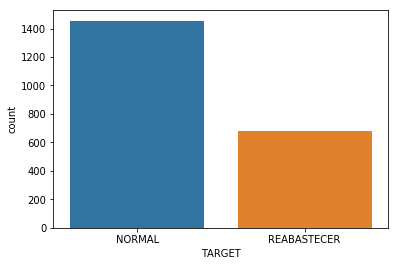

In [12]:
fig = plt.plot()
sns.countplot(x='TARGET', data=df_training_dataset)

## Pre-processando o dataset antes do treinamento

### Processando valores NaN com o SimpleImputer do sklearn

Para os valores NaN, usaremos a substituição pela constante 0 como **exemplo**.

Você pode escolher a estratégia que achar melhor para tratar os valores nulos :)

Docs: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html?highlight=simpleimputer#sklearn.impute.SimpleImputer

In [13]:
from sklearn.impute import SimpleImputer
import numpy as np


impute_zeros = SimpleImputer(
    missing_values=np.nan,
    strategy='constant',
    fill_value=0,
    verbose=0,
    copy=True
)

In [14]:
# Exibindo os dados ausentes do conjunto de dados antes da primeira transformação (df)
print("Valores nulos no df_training_dataset antes da transformação SimpleImputer: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))
import xgboost as xgb
# Aplicando a transformação ``SimpleImputer`` no conjunto de dados base
impute_zeros.fit(X=df_training_dataset)

# Reconstruindo um Pandas DataFrame com os resultados
df_training_dataset_imputed = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_training_dataset
    ),
    columns=df_training_dataset.columns
)

# Exibindo os dados ausentes do conjunto de dados após a primeira transformação (df)
print("Valores nulos no df_training_dataset após a transformação SimpleImputer: \n\n{}\n".format(df_training_dataset_imputed.isnull().sum(axis = 0)))

Valores nulos no df_training_dataset antes da transformação SimpleImputer: 

Tempo           0
Estação         0
LAT             0
LONG            0
Movimentação    0
Original_473    0
Original_269    0
Zero            0
Maçã-Verde      0
Tangerina       0
Citrus          0
Açaí-Guaraná    0
Pêssego         0
TARGET          0
dtype: int64

Valores nulos no df_training_dataset após a transformação SimpleImputer: 

Tempo           0
Estação         0
LAT             0
LONG            0
Movimentação    0
Original_473    0
Original_269    0
Zero            0
Maçã-Verde      0
Tangerina       0
Citrus          0
Açaí-Guaraná    0
Pêssego         0
TARGET          0
dtype: int64



### Eliminando colunas indesejadas

Vamos **demonstrar** abaixo como usar o método **DataFrame.drop()**.

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

In [15]:
df_training_dataset_imputed.head(10)

Tempo Estação      LAT     LONG  Movimentação  Original_473  \
0  2018-12-13      Sé -23.5500 -46.6333        194993            68   
1   2019-2-23      Sé -23.5500 -46.6333        191649            17   
2    2018-7-5      Sé -23.5500 -46.6333        192877            28   
3  2018-10-22      Sé -23.5500 -46.6333        194843            19   
4   2019-8-26      Sé -23.5500 -46.6333        193903            42   
5    2018-9-7    Brás -23.5451 -46.6162         71017             2   
6   2019-5-26      Sé -23.5500 -46.6333        194314            42   
7   2018-3-24    Brás -23.5451 -46.6162         71771            21   
8   2019-2-21    Brás -23.5451 -46.6162         72816            14   
9    2018-5-9    Brás -23.5451 -46.6162         73845            35   

   Original_269  Zero  Maçã-Verde  Tangerina  Citrus  Açaí-Guaraná  Pêssego  \
0            42    26          18         11      21            16       10   
1            11     5           1         32      39             2       21   
2            31    16          36          9      32            23       43   
3            49    59          40         28      31            39       28   
4            29    10          23         32      24            20       34   
5            27    49          13         19      23            36        3   
6            40    65          16         23      25            13       18   
7            51    16          37         16      41             5       43   
8             4    51          35         24      43            38       22   
9            35    31           5         43      39            33       30   

        TARGET  
0       NORMAL  
1  REABASTECER  
2       NORMAL  
3       NORMAL  
4       NORMAL  
5       NORMAL  
6       NORMAL  
7       NORMAL  
8       NORMAL  
9  REABASTECER

In [16]:
df_training_dataset_rmcolumns = df_training_dataset_imputed.drop(columns=['Tempo', 'Estação', 'LAT', 'LONG', 'Movimentação'], inplace=False)

In [17]:
df_training_dataset_rmcolumns.tail()

Original_473  Original_269  Zero  Maçã-Verde  Tangerina  Citrus  \
2129            78            45    13          24         39      32   
2130            86            65    40          13         43      30   
2131            11            45    29          26         14      28   
2132            52            29    61           4         33      29   
2133            54            25    24          12         37      43   

      Açaí-Guaraná  Pêssego       TARGET  
2129            17       38       NORMAL  
2130            40       11       NORMAL  
2131            38       25  REABASTECER  
2132            21        4  REABASTECER  
2133             3       22       NORMAL

# Atenção!

As colunas removidas acima são apenas para fim de exemplo, você pode usar as colunas que quiser e inclusive criar novas colunas com dados que achar importantes!


### Tratamento de de variáveis categóricas

Como mencionado antes, os computadores não são bons com variáveis "categóricas" (ou strings).

Dado uma coluna com variável categórica, o que podemos realizar é a codificação dessa coluna em múltiplas colunas contendo variáveis binárias. Esse processo é chamado de "one-hot-encoding" ou "dummy encoding". Se você não é familiarizado com esses termos, você pode pesquisar mais sobre isso na internet :)

In [18]:
# Tratando variáveis categóricas com o método Pandas ``get_dummies()''
# df_training = pd.get_dummies(df_training_dataset_rmcolumns, columns=['Estação'])
df_training = df_training_dataset_rmcolumns
df_training.tail()

Original_473  Original_269  Zero  Maçã-Verde  Tangerina  Citrus  \
2129            78            45    13          24         39      32   
2130            86            65    40          13         43      30   
2131            11            45    29          26         14      28   
2132            52            29    61           4         33      29   
2133            54            25    24          12         37      43   

      Açaí-Guaraná  Pêssego       TARGET  
2129            17       38       NORMAL  
2130            40       11       NORMAL  
2131            38       25  REABASTECER  
2132            21        4  REABASTECER  
2133             3       22       NORMAL

# Atenção!

A coluna **TARGET** deve ser mantida como uma string. Você não precisa processar/codificar a variável-alvo.

<hr>

## Treinando um classificador com base em uma árvore de decisão

### Selecionando FEATURES e definindo a variável TARGET

In [19]:
df_training.columns

Index(['Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina',
       'Citrus', 'Açaí-Guaraná', 'Pêssego', 'TARGET'],
      dtype='object')

In [20]:

features = df_training[
    [
        c for c in df_training.columns if c != 'TARGET'
    ]
]

target = df_training['TARGET']  ## NÃO TROQUE O NOME DA VARIÁVEL TARGET.


In [21]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2134 entries, 0 to 2133
Data columns (total 8 columns):
Original_473    2134 non-null int64
Original_269    2134 non-null int64
Zero            2134 non-null int64
Maçã-Verde      2134 non-null int64
Tangerina       2134 non-null int64
Citrus          2134 non-null int64
Açaí-Guaraná    2134 non-null int64
Pêssego         2134 non-null int64
dtypes: int64(8)
memory usage: 133.5 KB


### Dividindo nosso conjunto de dados em conjuntos de treinamento e teste

In [22]:
from sklearn.model_selection import train_test_split
X_train_unbalanced, X_test, y_train_unbalanced, y_test = train_test_split(features, target, test_size=0.33, random_state=133)

In [23]:
# Balanceamento do conjunto de dados de treinamento
balancer = SMOTE(sampling_strategy='auto', k_neighbors=3, random_state=133)
X_train, y_train = balancer.fit_resample(X_train_unbalanced, y_train_unbalanced)

# Visualização das classes após o balanceamento
y_train.value_counts()

NORMAL         979
REABASTECER    979
Name: TARGET, dtype: int64

In [24]:
#from sklearn import preprocessing
#mm_scaler = preprocessing.MinMaxScaler()
#X_train = mm_scaler.fit_transform(X_train_unscaled)
#X_test  = mm_scaler.transform(X_test_unscaled)

### Treinando uma árvore de decisão

In [39]:
# Criação de uma árvore de decisão com a biblioteca ``scikit-learn``:  
le = LabelEncoder()
le.fit(["NORMAL", "REABASTECER"])
y_train_encoded = le.transform(y_train)
y_test_encoded  = le.transform(y_test)

D_train = xgb.DMatrix(X_train, label=y_train_encoded)
D_test  = xgb.DMatrix(X_test, label=y_test_encoded)

In [73]:
epochs = 20
param  = {'colsample_bytree': 1, 
         'eta': 0.05, 
         'gamma': 0.0, 
         'max_depth': 8, 
         'min_child_weight': 1, 
          'subsample': 0.9,
         'objective': 'binary:logistic',
         'seed': 133}
model  = xgb.train(param, D_train, epochs)

In [74]:
#from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import KFold
#from sklearn.utils import parallel_backend

#parameters = {
#     "eta"              : [ 0.05, 0.10, 0.15, 0.20] ,
#     "max_depth"        : [ 4, 5, 6, 8 ],
#     "min_child_weight" : [ 1, 3, 5, 7 ],
#     "gamma"            : [ 0.0, 1.0, 5.0],
#     "colsample_bytree" : [ 0.8, 0.9, 1 ],
#     "subsample" : [ 0.8, 0.9, 1 ]
#}

#classifier = xgb.XGBClassifier()

#kfold = KFold(n_splits=3, shuffle=True, random_state=133)
#model = GridSearchCV(classifier, parameters, scoring="accuracy", n_jobs=-1, cv=kfold, verbose=2)
#model.fit(X_train, y_train)
#print("Best: %f using %s" % (model.best_score_, model.best_params_))

### Fazendo previsões na amostra de teste

In [75]:
y_pred = model.predict(D_test)
y_pred = [int(round(value)) for value in y_pred]
y_pred = le.inverse_transform(y_pred)

### Analisando a qualidade do modelo através da matriz de confusão

In [76]:
import matplotlib.pyplot as plt
import numpy as np
import itertools


def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

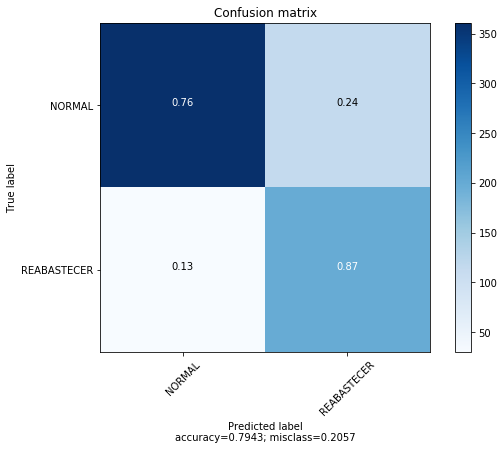

In [77]:
from sklearn.metrics import confusion_matrix


plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['NORMAL', 'REABASTECER'])

In [78]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

# Acurácia alcançada pela xgboost
print("Precision = {}".format(precision_score(y_test, y_pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, y_pred, average='macro')))
print("Acurácia: {}".format(accuracy_score(y_test, y_pred)))


Precision = 0.778515809536221
Recall = 0.8136994972661553
Acurácia: 0.7943262411347518


<hr>

## Scoring dos dados necessários para entregar a solução

Como entrega da sua solução, esperamos os resultados classificados no seguinte dataset chamado "to_be_scored.csv":

### Download da "folha de respostas"

In [79]:
!wget --no-check-certificate --content-disposition https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/ntn/to_be_scored.csv
df_to_be_scored = pd.read_csv(r'to_be_scored.csv')
df_to_be_scored.tail()

--2020-09-09 03:09:17--  https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/ntn/to_be_scored.csv
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘to_be_scored.csv.4’

    [ <=>                                   ] 70,291      --.-K/s   in 0.001s  

2020-09-09 03:09:17 (56.2 MB/s) - ‘to_be_scored.csv.4’ saved [70291]



Tempo             Estação      LAT     LONG  Movimentação  \
979  2019-8-19  Hospital São Paulo -23.5984 -46.6455         26787   
980  2019-8-20  Hospital São Paulo -23.5984 -46.6455         26629   
981  2019-8-21  Hospital São Paulo -23.5984 -46.6455         27517   
982  2019-8-22  Hospital São Paulo -23.5984 -46.6455         26860   
983  2019-8-23  Hospital São Paulo -23.5984 -46.6455         24571   

     Original_473  Original_269  Zero  Maçã-Verde  Tangerina  Citrus  \
979            34            65    28          17         33      27   
980            21            60    18          15         27      22   
981             9            56    13          14         21      17   
982            86            49     7          14         17      12   
983            74            41    65           8         14       7   

     Açaí-Guaraná  Pêssego  
979             6        2  
980            43       43  
981            37       37  
982            33       33  
983            27       27

In [80]:
df_to_be_scored = pd.read_csv('to_be_scored.csv')
df_to_be_scored.tail()

Tempo             Estação      LAT     LONG  Movimentação  \
979  2019-8-19  Hospital São Paulo -23.5984 -46.6455         26787   
980  2019-8-20  Hospital São Paulo -23.5984 -46.6455         26629   
981  2019-8-21  Hospital São Paulo -23.5984 -46.6455         27517   
982  2019-8-22  Hospital São Paulo -23.5984 -46.6455         26860   
983  2019-8-23  Hospital São Paulo -23.5984 -46.6455         24571   

     Original_473  Original_269  Zero  Maçã-Verde  Tangerina  Citrus  \
979            34            65    28          17         33      27   
980            21            60    18          15         27      22   
981             9            56    13          14         21      17   
982            86            49     7          14         17      12   
983            74            41    65           8         14       7   

     Açaí-Guaraná  Pêssego  
979             6        2  
980            43       43  
981            37       37  
982            33       33  
983            27       27

# Atenção!

O dataframe ``to_be_scored`` é a sua "folha de respostas". Note que a coluna "TARGET" não existe nessa amostra, que não pode ser então utilizada para treino de modelos de aprendizado supervisionado.

In [81]:
df_to_be_scored.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 13 columns):
Tempo           984 non-null object
Estação         984 non-null object
LAT             984 non-null float64
LONG            984 non-null float64
Movimentação    984 non-null int64
Original_473    984 non-null int64
Original_269    984 non-null int64
Zero            984 non-null int64
Maçã-Verde      984 non-null int64
Tangerina       984 non-null int64
Citrus          984 non-null int64
Açaí-Guaraná    984 non-null int64
Pêssego         984 non-null int64
dtypes: float64(2), int64(9), object(2)
memory usage: 100.0+ KB


<hr>

# Atenção!

# Para poder aplicar seu modelo e classificar a folha de respostas, você precisa primeiro aplicar as mesmas transformações com colunas que você aplicou no dataset de treino.

# Não remova ou adicione linhas na folha de respostas. 

# Não altere a ordem das linhas na folha de respostas.

# Ao final, as 1000 entradas devem estar classificadas, com os valores previstos em uma coluna chamada "target"

<hr>

Na célula abaixo, repetimos rapidamente os mesmos passos de pré-processamento usados no exemplo dado com árvore de decisão

In [82]:
# 1 - Removendo linhas com valores NaN
df_to_be_scored_1 = df_to_be_scored.dropna(axis='index', how='any', subset=['Tempo', 'Estação', 'LAT', 'LONG', 'Movimentação', 'Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina', 'Citrus', 'Açaí-Guaraná', 'Pêssego'])

# 2 - Inputando zeros nos valores faltantes
impute_zeros.fit(X=df_to_be_scored_1)
df_to_be_scored_2 = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_to_be_scored_1
    ),
    columns=df_to_be_scored_1.columns
)

# 3 - Remoção de colunas
df_to_be_scored_3 = df_to_be_scored_2.drop(columns=['Tempo', 'Estação', 'LAT', 'LONG', 'Movimentação'], inplace=False)

# 4 - Encoding com "dummy variables" (se necessário)
# df_to_be_scored_4 = pd.get_dummies(df_to_be_scored_3, columns=['Váriavel com dummy'])
df_to_be_scored_4 = df_to_be_scored_3

df_to_be_scored_4.tail()

Original_473  Original_269  Zero  Maçã-Verde  Tangerina  Citrus  \
979            34            65    28          17         33      27   
980            21            60    18          15         27      22   
981             9            56    13          14         21      17   
982            86            49     7          14         17      12   
983            74            41    65           8         14       7   

     Açaí-Guaraná  Pêssego  
979             6        2  
980            43       43  
981            37       37  
982            33       33  
983            27       27

<hr>

Pode ser verificado abaixo que as colunas da folha de resposta agora são idênticas às que foram usadas para treinar o modelo:

In [83]:
df_training[
    [
        'Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina',
       'Citrus', 'Açaí-Guaraná', 'Pêssego'
    ]
].columns

Index(['Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina',
       'Citrus', 'Açaí-Guaraná', 'Pêssego'],
      dtype='object')

In [84]:
df_to_be_scored_4.columns

Index(['Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina',
       'Citrus', 'Açaí-Guaraná', 'Pêssego'],
      dtype='object')

# Atenção

Para todas colunas que não existirem no "df_to_be_scored", você pode usar a técnica abaixo para adicioná-las:

In [85]:
#y_pred = model.predict(df_to_be_scored_4)
#df_to_be_scored_4['TARGET'] = y_pred
#df_to_be_scored_4.tail()
y_pred = model.predict(xgb.DMatrix(df_to_be_scored_4))
y_pred = [int(round(value)) for value in y_pred]
y_pred = le.inverse_transform(y_pred)
df_to_be_scored_4['TARGET'] = y_pred
df_to_be_scored_4.tail()

Original_473  Original_269  Zero  Maçã-Verde  Tangerina  Citrus  \
979            34            65    28          17         33      27   
980            21            60    18          15         27      22   
981             9            56    13          14         21      17   
982            86            49     7          14         17      12   
983            74            41    65           8         14       7   

     Açaí-Guaraná  Pêssego       TARGET  
979             6        2  REABASTECER  
980            43       43       NORMAL  
981            37       37  REABASTECER  
982            33       33  REABASTECER  
983            27       27       NORMAL

### Salvando a folha de respostas como um arquivo .csv para ser submetido

In [86]:
project.save_data(file_name="results.csv", data=df_to_be_scored_4.to_csv(index=False))

{'file_name': 'results.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'desafio7tntbh2020-donotdelete-pr-sxodq4a40nmlhn',
 'asset_id': '7dc78544-a6d1-4e3b-a0db-ee296e83b0ce'}

# Atenção

# A execução da célula acima irá criar um novo "data asset" no seu projeto no Watson Studio. Você precisará realizar o download deste arquivo juntamente com este notebook e criar um arquivo zip com os arquivos **results.csv** e **notebook.ipynb** para submissão. (os arquivos devem estar nomeados desta forma)

<hr>

## Parabéns!

Se você já está satisfeito com a sua solução, vá até a página abaixo e envie os arquivos necessários para submissão.

# https://tnt.maratona.dev
